#### Import Necessary packages



In [133]:
# Data Manipulation and Handling
import pandas as pd
import numpy as np
import pyodbc
from dotenv import dotenv_values

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
import scipy.stats as stats

# Other Utilities
import os
import warnings
warnings.filterwarnings('ignore')



#### Load datasets from Onedrive

In [134]:
df_Sales_January_2019 = pd.read_csv("data/Sales_January_2019.csv")
df_Sales_January_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


In [135]:
df_Sales_February_2019 = pd.read_csv("data/Sales_February_2019.csv")
df_Sales_February_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"
...,...,...,...,...,...,...
12031,162004,Apple Airpods Headphones,1,150,02/12/19 22:02,"227 Church St, San Francisco, CA 94016"
12032,162005,AAA Batteries (4-pack),2,2.99,02/04/19 20:44,"417 Jefferson St, Los Angeles, CA 90001"
12033,162006,USB-C Charging Cable,1,11.95,02/24/19 06:31,"498 8th St, Atlanta, GA 30301"
12034,162007,USB-C Charging Cable,1,11.95,02/24/19 19:09,"715 7th St, Dallas, TX 75001"


In [136]:
df_Sales_March_2019 = pd.read_csv("data/Sales_March_2019.csv")
df_Sales_March_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016"
15222,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016"
15223,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001"
15224,176557,iPhone,1,700,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016"


In [137]:
df_Sales_April_2019 = pd.read_csv("data/Sales_April_2019.csv")
df_Sales_April_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [138]:
df_Sales_May_2019 = pd.read_csv("data/Sales_May_2019.csv")
df_Sales_May_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"
...,...,...,...,...,...,...
16630,209916,Bose SoundSport Headphones,1,99.99,05/08/19 19:15,"235 Center St, Seattle, WA 98101"
16631,209917,Wired Headphones,1,11.99,05/24/19 22:02,"926 9th St, San Francisco, CA 94016"
16632,209918,AAA Batteries (4-pack),2,2.99,05/24/19 17:44,"868 Hickory St, Boston, MA 02215"
16633,209919,USB-C Charging Cable,1,11.95,05/04/19 12:46,"204 Adams St, Seattle, WA 98101"


In [139]:
df_Sales_June_2019 = pd.read_csv("data/Sales_June_2019.csv")
df_Sales_June_2019

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


#### Load Dataset from the Database

In [140]:
# Loading environment variables from .env file
environment_variables = dotenv_values('.env')
 
# Getting the values for the credentials set in the .env file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")
 
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"
# Connecting to the server
try:
    connection = pyodbc.connect(connection_string)
    print("Connection successful")
except Exception as e:
    print(f"Connection failed: {e}")

Connection successful


In [141]:
# Define the SQL query to show specific tables in the database
db_query = """
        SELECT *
        FROM INFORMATION_SCHEMA.TABLES
        WHERE TABLE_SCHEMA = 'dbo'
        """
# Read data from the SQL query result into a DataFrame using the established database connection
schema_df = pd.read_sql(db_query, connection)
 
#  Check whether data has been retrieved successfully to confirm successful connection to database
try:
    schema_df = pd.read_sql(db_query, connection)    
    print("Data retrieved successfully")
    print()
    print(schema_df)    
except Exception as e:
    print("Failed to retrieve data:", e)

Data retrieved successfully

  TABLE_CATALOG TABLE_SCHEMA            TABLE_NAME  TABLE_TYPE
0         dapDB          dbo       Sales_July_2019  BASE TABLE
1         dapDB          dbo     Sales_August_2019  BASE TABLE
2         dapDB          dbo  Sales_September_2019  BASE TABLE
3         dapDB          dbo    Sales_October_2019  BASE TABLE
4         dapDB          dbo   Sales_November_2019  BASE TABLE
5         dapDB          dbo   Sales_December_2019  BASE TABLE


In [142]:
# Define the SQL query to show specific tables in the database
db_query = """
        SELECT *
        FROM INFORMATION_SCHEMA.TABLES
        WHERE TABLE_SCHEMA = 'dbo'
        """
# Read data from the SQL query result into a DataFrame using the established database connection
try:
    schema_df = pd.read_sql(db_query, connection)    
    print("Data retrieved successfully")
    print()
    print(schema_df)    
    # Save the DataFrame to a CSV file
    schema_df.to_csv('schema_output.csv', index=False)  # Set 'index=False' to avoid writing the index column to the CSV
    print("Data saved to CSV successfully.")
 
except Exception as e:
    print("Failed to retrieve data:", e)

Data retrieved successfully

  TABLE_CATALOG TABLE_SCHEMA            TABLE_NAME  TABLE_TYPE
0         dapDB          dbo       Sales_July_2019  BASE TABLE
1         dapDB          dbo     Sales_August_2019  BASE TABLE
2         dapDB          dbo  Sales_September_2019  BASE TABLE
3         dapDB          dbo    Sales_October_2019  BASE TABLE
4         dapDB          dbo   Sales_November_2019  BASE TABLE
5         dapDB          dbo   Sales_December_2019  BASE TABLE
Data saved to CSV successfully.


In [143]:
#define the SQL query to show specific tables
db_query = """
        SELECT *
        FROM Sales_July_2019
        """
#Read data from the SQL query into Dataframe
df_Sales_July_2019 = pd.read_sql(db_query, connection)
df_Sales_July_2019

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.0,Apple Airpods Headphones,1.0,150.000000,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.000000,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.840000,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.840000,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.990000,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"
...,...,...,...,...,...,...
14366,236665.0,Wired Headphones,1.0,11.990000,2020-07-19 16:16:00.0000000,"694 Meadow St, Atlanta, GA 30301"
14367,236666.0,20in Monitor,1.0,109.989998,2031-07-19 20:11:00.0000000,"866 14th St, San Francisco, CA 94016"
14368,236667.0,AAA Batteries (4-pack),1.0,2.990000,2017-07-19 22:29:00.0000000,"249 Cherry St, Dallas, TX 75001"
14369,236668.0,Wired Headphones,1.0,11.990000,2030-07-19 19:28:00.0000000,"727 Wilson St, Austin, TX 73301"


In [144]:
df_Sales_July_2019.isnull().sum()

Order_ID            80
Product             45
Quantity_Ordered    80
Price_Each          80
Order_Date          80
Purchase_Address    45
dtype: int64

In [145]:
#define the SQL query to show specific tables
db_query = """
        SELECT *
        FROM Sales_August_2019
        """
#Read data from the SQL query into Dataframe
df_Sales_August_2019 = pd.read_sql(db_query, connection)
df_Sales_August_2019

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670.0,Wired Headphones,2.0,11.990000,2031-08-19 22:21:00.0000000,"359 Spruce St, Seattle, WA 98101"
1,236671.0,Bose SoundSport Headphones,1.0,99.989998,2015-08-19 15:11:00.0000000,"492 Ridge St, Dallas, TX 75001"
2,236672.0,iPhone,1.0,700.000000,2006-08-19 14:40:00.0000000,"149 7th St, Portland, OR 97035"
3,236673.0,AA Batteries (4-pack),2.0,3.840000,2029-08-19 20:59:00.0000000,"631 2nd St, Los Angeles, CA 90001"
4,236674.0,AA Batteries (4-pack),2.0,3.840000,2015-08-19 19:53:00.0000000,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
12006,248146.0,Bose SoundSport Headphones,1.0,99.989998,2029-08-19 22:19:00.0000000,"868 Hickory St, San Francisco, CA 94016"
12007,248147.0,AAA Batteries (4-pack),3.0,2.990000,2031-08-19 16:26:00.0000000,"206 Lakeview St, Boston, MA 02215"
12008,248148.0,AA Batteries (4-pack),1.0,3.840000,2002-08-19 07:25:00.0000000,"568 13th St, Seattle, WA 98101"
12009,248149.0,USB-C Charging Cable,1.0,11.950000,2008-08-19 12:10:00.0000000,"495 Walnut St, San Francisco, CA 94016"


In [146]:
df_Sales_August_2019.isnull().sum()

Order_ID            54
Product             28
Quantity_Ordered    54
Price_Each          54
Order_Date          54
Purchase_Address    28
dtype: int64

In [147]:
#define the SQL query to show specific tables
db_query = """
        SELECT *
        FROM Sales_September_2019
        """
#Read data from the SQL query into Dataframe
df_Sales_September_2019 = pd.read_sql(db_query, connection)
df_Sales_September_2019

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,248151.0,AA Batteries (4-pack),4.0,3.840000,2017-09-19 14:44:00.0000000,"380 North St, Los Angeles, CA 90001"
1,248152.0,USB-C Charging Cable,2.0,11.950000,2029-09-19 10:19:00.0000000,"511 8th St, Austin, TX 73301"
2,248153.0,USB-C Charging Cable,1.0,11.950000,2016-09-19 17:48:00.0000000,"151 Johnson St, Los Angeles, CA 90001"
3,248154.0,27in FHD Monitor,1.0,149.990005,2027-09-19 07:52:00.0000000,"355 Hickory St, Seattle, WA 98101"
4,248155.0,USB-C Charging Cable,1.0,11.950000,2001-09-19 19:03:00.0000000,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
11681,259353.0,AAA Batteries (4-pack),3.0,2.990000,2017-09-19 20:56:00.0000000,"840 Highland St, Los Angeles, CA 90001"
11682,259354.0,iPhone,1.0,700.000000,2001-09-19 16:00:00.0000000,"216 Dogwood St, San Francisco, CA 94016"
11683,259355.0,iPhone,1.0,700.000000,2023-09-19 07:39:00.0000000,"220 12th St, San Francisco, CA 94016"
11684,259356.0,34in Ultrawide Monitor,1.0,379.989990,2019-09-19 17:30:00.0000000,"511 Forest St, San Francisco, CA 94016"


In [148]:
df_Sales_September_2019.isnull().sum()

Order_ID            57
Product             40
Quantity_Ordered    57
Price_Each          57
Order_Date          57
Purchase_Address    40
dtype: int64

In [149]:
df_Sales_September_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11686 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          11629 non-null  float64
 1   Product           11646 non-null  object 
 2   Quantity_Ordered  11629 non-null  float64
 3   Price_Each        11629 non-null  float64
 4   Order_Date        11629 non-null  object 
 5   Purchase_Address  11646 non-null  object 
dtypes: float64(3), object(3)
memory usage: 547.9+ KB


In [150]:
#define the SQL query to show specific tables
db_query = """
        SELECT *
        FROM Sales_October_2019
        """
#Read data from the SQL query into Dataframe
df_Sales_October_2019 = pd.read_sql(db_query, connection)
df_Sales_October_2019

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,259358.0,34in Ultrawide Monitor,1.0,379.989990,2028-10-19 10:56:00.0000000,"609 Cherry St, Dallas, TX 75001"
1,259359.0,27in 4K Gaming Monitor,1.0,389.989990,2028-10-19 17:26:00.0000000,"225 5th St, Los Angeles, CA 90001"
2,259360.0,AAA Batteries (4-pack),2.0,2.990000,2024-10-19 17:20:00.0000000,"967 12th St, New York City, NY 10001"
3,259361.0,27in FHD Monitor,1.0,149.990005,2014-10-19 22:26:00.0000000,"628 Jefferson St, New York City, NY 10001"
4,259362.0,Wired Headphones,1.0,11.990000,2007-10-19 16:10:00.0000000,"534 14th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
20374,278792.0,AA Batteries (4-pack),1.0,3.840000,2012-10-19 04:32:00.0000000,"920 Adams St, San Francisco, CA 94016"
20375,278793.0,Wired Headphones,1.0,11.990000,2028-10-19 22:00:00.0000000,"161 Chestnut St, Los Angeles, CA 90001"
20376,278794.0,AA Batteries (4-pack),1.0,3.840000,2009-10-19 20:58:00.0000000,"346 Spruce St, San Francisco, CA 94016"
20377,278795.0,iPhone,1.0,700.000000,2031-10-19 17:21:00.0000000,"291 Hill St, Seattle, WA 98101"


In [151]:
#define the SQL query to show specific tables
db_query = """
        SELECT *
        FROM Sales_November_2019
        """
#Read data from the SQL query into Dataframe
df_Sales_November_2019 = pd.read_sql(db_query, connection)
df_Sales_November_2019

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,278797.0,Wired Headphones,1.0,11.990000,2021-11-19 09:54:00.0000000,"46 Park St, New York City, NY 10001"
1,278798.0,USB-C Charging Cable,2.0,11.950000,2017-11-19 10:03:00.0000000,"962 Hickory St, Austin, TX 73301"
2,278799.0,Apple Airpods Headphones,1.0,150.000000,2019-11-19 14:56:00.0000000,"464 Cherry St, Los Angeles, CA 90001"
3,278800.0,27in FHD Monitor,1.0,149.990005,2025-11-19 22:24:00.0000000,"649 10th St, Seattle, WA 98101"
4,278801.0,Bose SoundSport Headphones,1.0,99.989998,2009-11-19 13:56:00.0000000,"522 Hill St, Boston, MA 02215"
...,...,...,...,...,...,...
17656,295660.0,AAA Batteries (4-pack),2.0,2.990000,2004-11-19 14:17:00.0000000,"574 4th St, Los Angeles, CA 90001"
17657,295661.0,USB-C Charging Cable,1.0,11.950000,2023-11-19 07:22:00.0000000,"359 1st St, Austin, TX 73301"
17658,295662.0,Lightning Charging Cable,1.0,14.950000,2013-11-19 16:12:00.0000000,"900 10th St, Boston, MA 02215"
17659,295663.0,AAA Batteries (4-pack),1.0,2.990000,2017-11-19 17:08:00.0000000,"592 Sunset St, Boston, MA 02215"


In [152]:
#define the SQL query to show specific tables
db_query = """
        SELECT *
        FROM Sales_December_2019
        """
#Read data from the SQL query into Dataframe
df_Sales_December_2019 = pd.read_sql(db_query, connection)
df_Sales_December_2019

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,295665.0,Macbook Pro Laptop,1.0,1700.000000,2030-12-19 00:01:00.0000000,"136 Church St, New York City, NY 10001"
1,295666.0,LG Washing Machine,1.0,600.000000,2029-12-19 07:03:00.0000000,"562 2nd St, New York City, NY 10001"
2,295667.0,USB-C Charging Cable,1.0,11.950000,2012-12-19 18:21:00.0000000,"277 Main St, New York City, NY 10001"
3,295668.0,27in FHD Monitor,1.0,149.990005,2022-12-19 15:13:00.0000000,"410 6th St, San Francisco, CA 94016"
4,295669.0,USB-C Charging Cable,1.0,11.950000,2018-12-19 12:38:00.0000000,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.950000,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016"
25113,319667.0,AA Batteries (4-pack),2.0,3.840000,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001"
25114,319668.0,Vareebadd Phone,1.0,400.000000,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101"
25115,319669.0,Wired Headphones,1.0,11.990000,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001"


#### Exploratory Data Analysis

##### joining all the datasets unsing concatination

In [153]:
import pandas as pd

# Function to standardize column names
def standardize_column_names(df):
    # Convert to lowercase and replace spaces and underscores with an empty string
    df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('_', '_')
    return df

# List of all the monthly DataFrames
monthly_dfs = [
    df_Sales_January_2019,
    df_Sales_February_2019,
    df_Sales_March_2019,
    df_Sales_April_2019,
    df_Sales_May_2019,
    df_Sales_June_2019,
    df_Sales_July_2019,
    df_Sales_August_2019,
    df_Sales_September_2019,
    df_Sales_October_2019,
    df_Sales_November_2019,
    df_Sales_December_2019
]

# Standardize column names for each DataFrame
standardized_dfs = [standardize_column_names(df) for df in monthly_dfs]

# Concatenating them into a single DataFrame
df_sales = pd.concat(standardized_dfs)

# Optionally, reset the index if needed
df_sales.reset_index(drop=True, inplace=True)

# Show the resulting DataFrame
df_sales.isnull().sum()


order_id            740
product             545
quantity_ordered    740
price_each          740
order_date          740
purchase_address    545
dtype: int64

#### Dealing with the missing values in Each dataset

In [154]:
#gettng to know the data we are dealing with
print("="*50)
print("First Five rows ","\n")
print(df_sales.head(5),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df_sales.info(),"\n")

print("="*50)
print("Describe the Dataset","\n")
print(df_sales.describe().T,"\n")

print("="*50)
print("Null Values t ","\n")
print(df_sales.isnull().sum(),"\n")

print("="*50)
print(" Shape of the Dataset","\n")
print(df_sales.shape,"\n")

First Five rows  

  order_id                   product quantity_ordered price_each  \
0   141234                    iPhone                1        700   
1   141235  Lightning Charging Cable                1      14.95   
2   141236          Wired Headphones                2      11.99   
3   141237          27in FHD Monitor                1     149.99   
4   141238          Wired Headphones                1      11.99   

       order_date                       purchase_address  
0  01/22/19 21:25        944 Walnut St, Boston, MA 02215  
1  01/28/19 14:15       185 Maple St, Portland, OR 97035  
2  01/17/19 13:33  538 Adams St, San Francisco, CA 94016  
3  01/05/19 20:33     738 10th St, Los Angeles, CA 90001  
4  01/25/19 11:59          387 10th St, Austin, TX 73301   

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------

#### changing date column into datetime

In [165]:
#Changing date column to datetime format
df_sales['order_date'] = pd.to_datetime(df_sales['order_date'], errors='coerce')


##### dealing with the missing values

In [156]:

# Dropping rows where 'Order_ID' or 'Order_Date' is missing
df_sales = df_sales.dropna(subset=['order_id', 'order_date'])

# Convert 'Quantity_Ordered' and 'Price_Each' to numeric, coercing errors
df_sales['quantity_ordered'] = pd.to_numeric(df_sales['quantity_ordered'], errors='coerce')
df_sales['price_each'] = pd.to_numeric(df_sales['price_each'], errors='coerce')

# Filling missing numerical data with median
df_sales['quantity_ordered'].fillna(df_sales['quantity_ordered'].median(), inplace=True)
df_sales['price_each'].fillna(df_sales['price_each'].median(), inplace=True)

# Filling missing categorical data with mode
df_sales['product'].fillna(df_sales['product'].mode()[0], inplace=True)
df_sales['purchase_address'].fillna(df_sales['purchase_address'].mode()[0], inplace=True)

# Final cleaned DataFrame
print(df_sales.isnull().sum())



order_id            0
product             0
quantity_ordered    0
price_each          0
order_date          0
purchase_address    0
dtype: int64


In [157]:
df_sales.columns

Index(['order_id', 'product', 'quantity_ordered', 'price_each', 'order_date',
       'purchase_address'],
      dtype='object')

### Answering Business questions

1.How much money did we make this year?

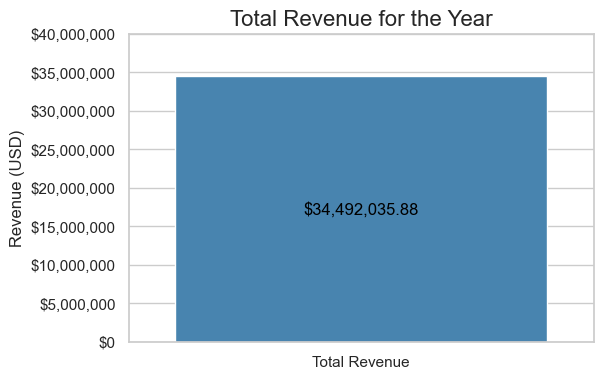

In [158]:
# Create a new 'revenue' column (Quantity Ordered * Price Each)
df_sales['revenue'] = df_sales['quantity_ordered'] * df_sales['price_each']

# Calculate total revenue for the year
total_revenue = df_sales['revenue'].sum()

# Create a bar chart 
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.barplot(x=["Total Revenue"], y=[total_revenue], palette="Blues_d")
plt.text(0, total_revenue / 2, f'${total_revenue:,.2f}', ha='center', va='center', fontsize=12, color='black')
plt.title('Total Revenue for the Year', fontsize=16)
plt.ylabel('Revenue (USD)', fontsize=12)
plt.yticks(ticks=plt.yticks()[0], labels=['${:,.0f}'.format(y) for y in plt.yticks()[0]])
plt.show()


2.Can we identify any seasonality in the sales?

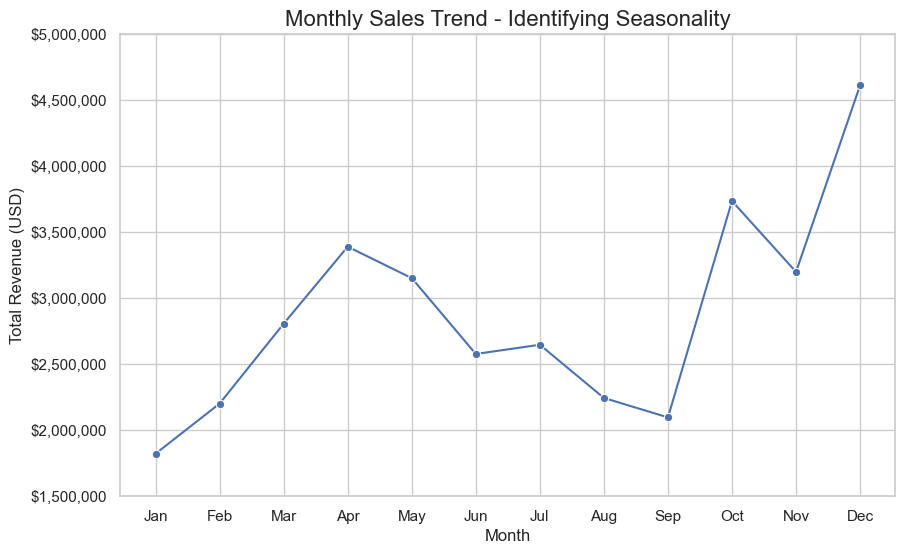

In [159]:

#Extract the month from the date column
df_sales['month'] = df_sales['order_date'].dt.month
#Calculate total revenue for each month
df_sales['revenue'] = df_sales['quantity_ordered'] * df_sales['price_each']
monthly_sales = df_sales.groupby('month')['revenue'].sum().reset_index()

# Create a line plot to visualize sales by month
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='revenue', data=monthly_sales, marker='o', color='b')
plt.title('Monthly Sales Trend - Identifying Seasonality', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  
plt.yticks(ticks=plt.yticks()[0], labels=['${:,.0f}'.format(y) for y in plt.yticks()[0]]) 
plt.show()


Seasonality Observations:
- End-of-Year Peak: There is a clear pattern of higher sales in the final quarter, especially in December, which could indicate a holiday season or year-end purchases.
- Mid-Year Slump: The drop in sales around June to September could represent a seasonal dip, possibly due to summer holidays or low market activity.
- Early-Year Growth: The steady rise from January to April could reflect renewed demand post-holiday season or the start of a new fiscal year for many businesses.
- This pattern is typical in industries with significant holiday and year-end sales or promotions, and the chart effectively highlights the seasonality in sales performance.

3.What are our best and worst-selling products?

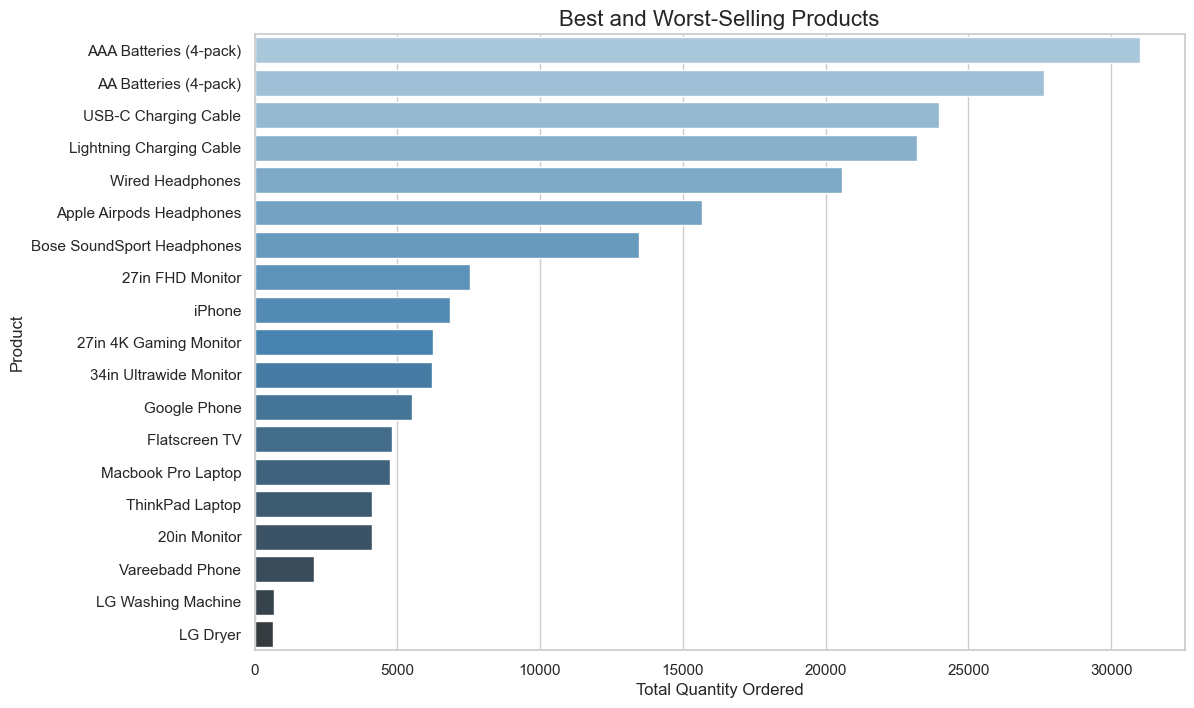

In [160]:

# Calculate total quantity ordered for each product
product_sales = df_sales.groupby('product')['quantity_ordered'].sum().reset_index()

# Sort products by total quantity ordered ascending
product_sales = product_sales.sort_values(by='quantity_ordered', ascending=False)

# Create a bar plot 
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.barplot(x='quantity_ordered', y='product', data=product_sales, palette='Blues_d')
plt.title('Best and Worst-Selling Products', fontsize=16)
plt.xlabel('Total Quantity Ordered', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.show()


4.How do sales compare to previous months or weeks?

#### Monthly comparison

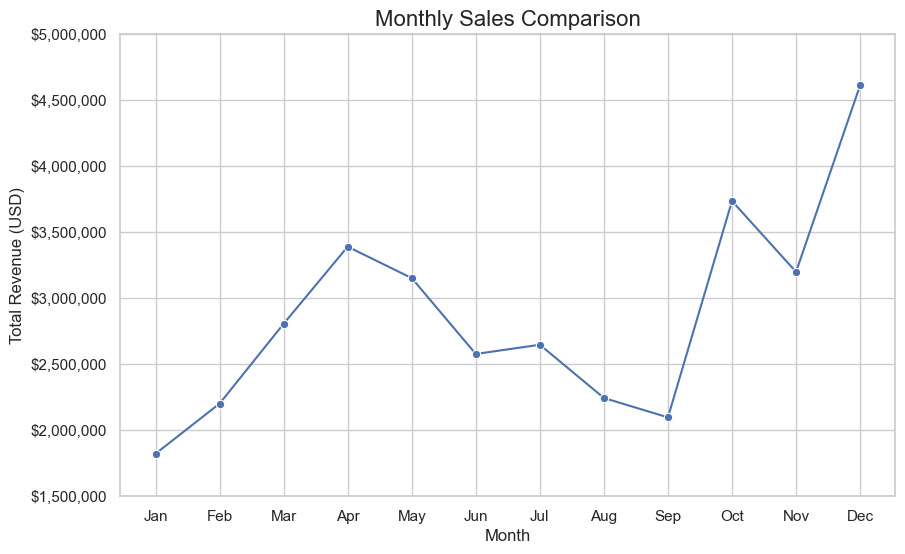

In [161]:
# Extract the month  from the date column
df_sales['month'] = df_sales['order_date'].dt.month

# total revenue for each month
df_sales['revenue'] = df_sales['quantity_ordered'] * df_sales['price_each']
monthly_sales = df_sales.groupby('month')['revenue'].sum().reset_index()

# Step 3: Create a line plot 
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(x='month', y='revenue', data=monthly_sales, marker='o', color='b')
plt.title('Monthly Sales Comparison', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  
plt.yticks(ticks=plt.yticks()[0], labels=['${:,.0f}'.format(y) for y in plt.yticks()[0]])  
plt.show()


##### weekly comparison

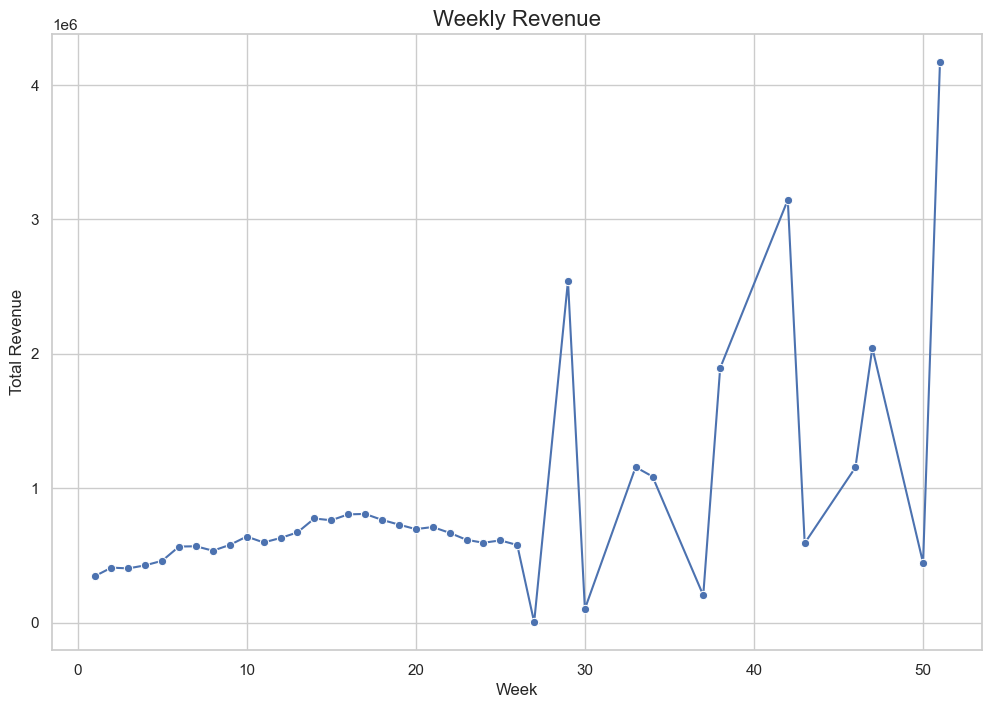

In [162]:
#Extract the week number from date column
df_sales['week'] = df_sales['order_date'].dt.isocalendar().week
# Total revenue for each week
weekly_sales = df_sales.groupby('week')['revenue'].sum().reset_index()
# line plot ue
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.lineplot(x='week', y='revenue', data=weekly_sales, marker='o', color='b')
plt.title('Weekly Revenue', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.show()


5.Which cities are our products delivered to most?

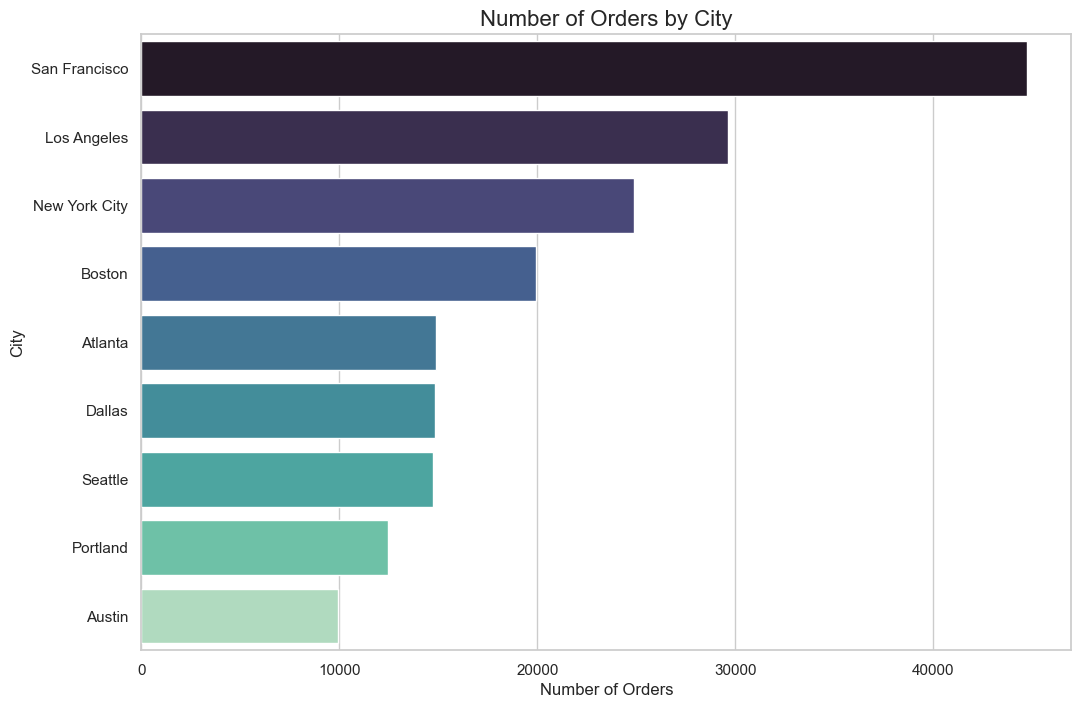

In [163]:
# Extract the city from 'Purchase_Address'
def extract_city(address):
    try:
        parts = address.split(',')
        if len(parts) >= 2:
            return parts[1].strip()  
        else:
            return None  
    except AttributeError:
        return None  

# Apply the extract_city function to the 'purchase_address' column
df_sales['city'] = df_sales['purchase_address'].apply(extract_city)

# Step 2: Count the number of orders for each city
city_sales = df_sales['city'].value_counts().reset_index()
city_sales.columns = ['city', 'num_orders']

#  bar plot to visualize the cities with most orders
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.barplot(x='num_orders', y='city', data=city_sales, palette='mako')
plt.title('Number of Orders by City', fontsize=16)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()



6.How do product categories compare in revenue generated and quantities ordered?

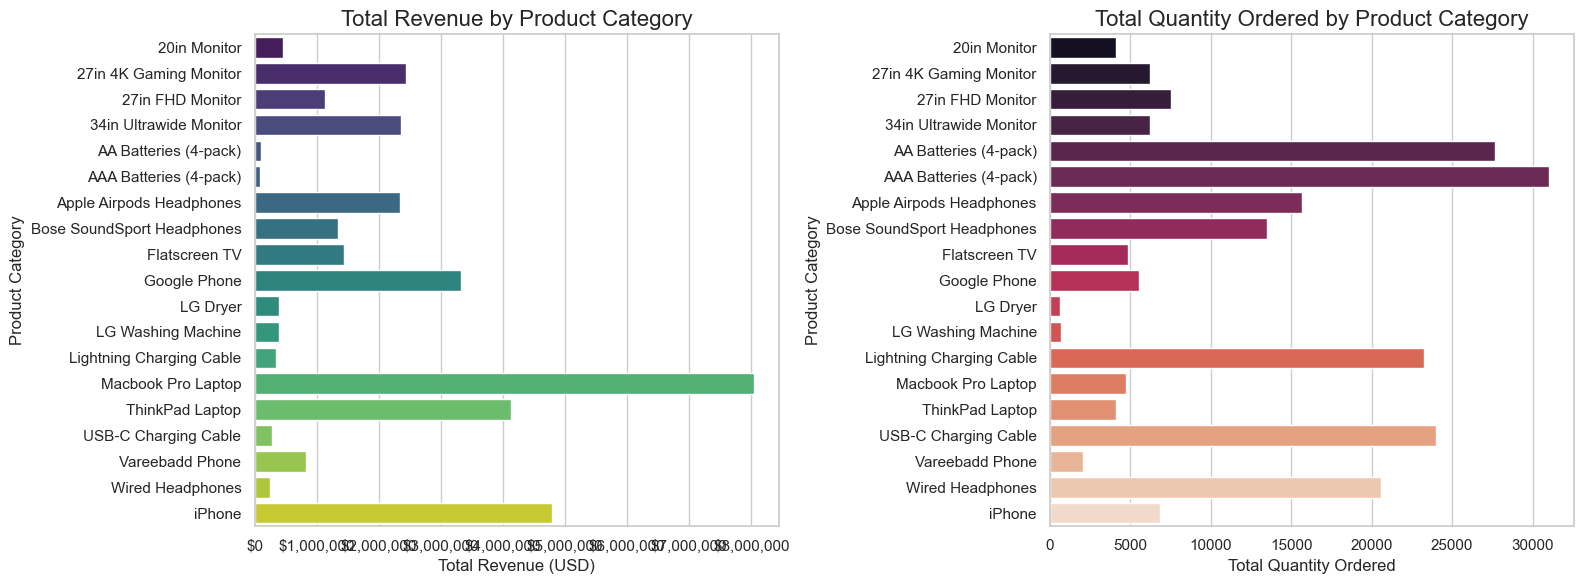

In [164]:

# Calculate total revenue and quantity ordered for each product category
category_sales = df_sales.groupby('product').agg({
    'revenue': 'sum', 
    'quantity_ordered': 'sum'
}).reset_index()

# Create two subplots: one for total revenue and one for total quantity ordered
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.set(style="whitegrid")

# Plot for revenue generated by product category
sns.barplot(x='revenue', y='product', data=category_sales, ax=axes[0], palette='viridis')
axes[0].set_title('Total Revenue by Product Category', fontsize=16)
axes[0].set_xlabel('Total Revenue (USD)', fontsize=12)
axes[0].set_ylabel('Product Category', fontsize=12)
axes[0].set_xticklabels(['${:,.0f}'.format(x) for x in axes[0].get_xticks()]) 
# Plot for quantity ordered by product category
sns.barplot(x='quantity_ordered', y='product', data=category_sales, ax=axes[1], palette='rocket')
axes[1].set_title('Total Quantity Ordered by Product Category', fontsize=16)
axes[1].set_xlabel('Total Quantity Ordered', fontsize=12)
axes[1].set_ylabel('Product Category', fontsize=12)
plt.tight_layout()
plt.show()


7.Provide additional details from your findings in the data.

In [166]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          185950 non-null  object        
 1   product           185950 non-null  object        
 2   quantity_ordered  185950 non-null  float64       
 3   price_each        185950 non-null  float64       
 4   order_date        185950 non-null  datetime64[ns]
 5   purchase_address  185950 non-null  object        
 6   revenue           185950 non-null  float64       
 7   month             185950 non-null  int32         
 8   week              185950 non-null  UInt32        
 9   city              185950 non-null  object        
dtypes: UInt32(1), datetime64[ns](1), float64(3), int32(1), object(4)
memory usage: 14.4+ MB
